In [1]:
import os
os.getcwd()  # Get Working Directory

'C:\\Users\\Laptop\\DroneCourse\\ENVS333\\DeepLearn\\augment2'

In [2]:
%%time
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

Using TensorFlow backend.
C:\Users\Laptop\Anaconda3\envs\deeptest\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Laptop\Anaconda3\envs\deeptest\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Laptop\Anaconda3\envs\deeptest\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Laptop\Anaconda3\envs\deep

Wall time: 1.72 s


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [11]:
# dimensions of our images.
img_width, img_height = 150, 150

In [12]:
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 10
batch_size = 30

In [13]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
train_generator[0]

(array([[[[0.5092891 , 0.6042394 , 0.62333244],
          [0.51662236, 0.6115907 , 0.63068664],
          [0.5432951 , 0.6331983 , 0.66067976],
          ...,
          [0.9872063 , 0.9872063 , 0.9872063 ],
          [0.9822275 , 0.9822275 , 0.9822275 ],
          [0.97647065, 0.97647065, 0.97647065]],
 
         [[0.5089479 , 0.5798813 , 0.592502  ],
          [0.5278744 , 0.59882873, 0.6122204 ],
          [0.5636656 , 0.635393  , 0.65527654],
          ...,
          [0.9872063 , 0.9872063 , 0.9872063 ],
          [0.9822275 , 0.9822275 , 0.9822275 ],
          [0.97647065, 0.97647065, 0.97647065]],
 
         [[0.53549606, 0.5790057 , 0.5701486 ],
          [0.5648982 , 0.6088024 , 0.6057641 ],
          [0.60322607, 0.6538658 , 0.6619983 ],
          ...,
          [0.9872063 , 0.9872063 , 0.9872063 ],
          [0.9822275 , 0.9822275 , 0.9822275 ],
          [0.97647065, 0.97647065, 0.97647065]],
 
         ...,
 
         [[0.7387185 , 0.91916925, 0.9976006 ],
          [0.73719

In [22]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 800 images belonging to 2 classes.


In [36]:
validation_generator[3]

(array([[[[0.1137255 , 0.17254902, 0.15294118],
          [0.16470589, 0.2509804 , 0.2392157 ],
          [0.3137255 , 0.38823533, 0.37254903],
          ...,
          [0.227451  , 0.33333334, 0.5019608 ],
          [0.20784315, 0.3137255 , 0.48235297],
          [0.20392159, 0.30980393, 0.4784314 ]],
 
         [[0.10588236, 0.16470589, 0.1764706 ],
          [0.09411766, 0.1764706 , 0.18039216],
          [0.13333334, 0.20784315, 0.20000002],
          ...,
          [0.19607845, 0.3019608 , 0.47058827],
          [0.20392159, 0.30980393, 0.4784314 ],
          [0.20000002, 0.30588236, 0.47450984]],
 
         [[0.18039216, 0.2509804 , 0.30588236],
          [0.14901961, 0.22352943, 0.2784314 ],
          [0.09019608, 0.15686275, 0.18431373],
          ...,
          [0.20000002, 0.30588236, 0.47450984],
          [0.18431373, 0.2901961 , 0.45882356],
          [0.21176472, 0.31764707, 0.48627454]],
 
         ...,
 
         [[0.9568628 , 1.        , 0.9843138 ],
          [0.93333

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [31]:
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
66/66 [==============================] - 36s 551ms/step - loss: 0.7096 - accuracy: 0.5102 - val_loss: 0.7028 - val_accuracy: 0.5013
Epoch 2/10
66/66 [==============================] - 36s 544ms/step - loss: 0.6923 - accuracy: 0.5086 - val_loss: 0.6935 - val_accuracy: 0.5429
Epoch 3/10
66/66 [==============================] - 36s 547ms/step - loss: 0.6894 - accuracy: 0.5462 - val_loss: 0.6855 - val_accuracy: 0.5416
Epoch 4/10
66/66 [==============================] - 35s 536ms/step - loss: 0.6878 - accuracy: 0.5421 - val_loss: 0.6527 - val_accuracy: 0.5156
Epoch 5/10
66/66 [==============================] - 36s 552ms/step - loss: 0.6841 - accuracy: 0.5563 - val_loss: 0.6677 - val_accuracy: 0.5623
Epoch 6/10
66/66 [==============================] - 37s 554ms/step - loss: 0.6805 - accuracy: 0.5508 - val_loss: 0.7094 - val_accuracy: 0.5506
Epoch 7/10
66/66 [==============================] - 36s 553ms/step - loss: 0.6799 - accuracy: 0.5665 - val_loss: 0.6783 - val_accuracy: 0.5753

In [27]:

model.evaluate_generator(generator=validation_generator,
steps=STEP_SIZE_VALID)

[0.6893026232719421, 0.5679486989974976]

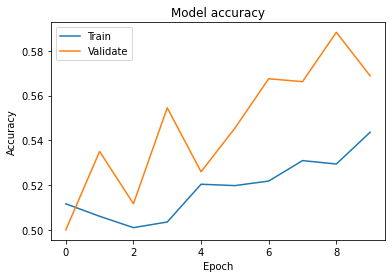

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()